# HuggingFace

In addition to torchvision and torch.hub one can also find models in other repositories. One of the most popular places is HugginFace, a site that proposes dataset, models as well as a few important packages such as ```transformers``` implementing popular models. One can browse through the site, find a relevant model and then, if documentation is sufficient, just run an demo example.

Her we picked a [Detection Transformer model](https://huggingface.co/facebook/detr-resnet-101) from Facebook. The page shows an example on how to run a model that we just copy here.

Just like in torchvision, the HF models expect some data pre-processing, which is here taken care of by the ```DetrImageProcessor``` object.

Obviously, to fully understand a model, one need to dedicate additional time. But repositories like HF are great places where to experiment with existing solutions.

In [15]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

image = Image.open('../data/woody_baille.JPG')

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Some weights of the model checkpoint at facebook/detr-resnet-101 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected cat with confidence 1.0 at location [265.99, 492.65, 1476.46, 1001.98]


In [16]:
import numpy as np

coords = results['boxes'].detach().numpy()
box = np.array([[coords[0][0],coords[0][1]],
[coords[0][0],coords[0][3]],
[coords[0][2],coords[0][3]],
 [coords[0][2],coords[0][1]],
               [coords[0][0],coords[0][1]]])

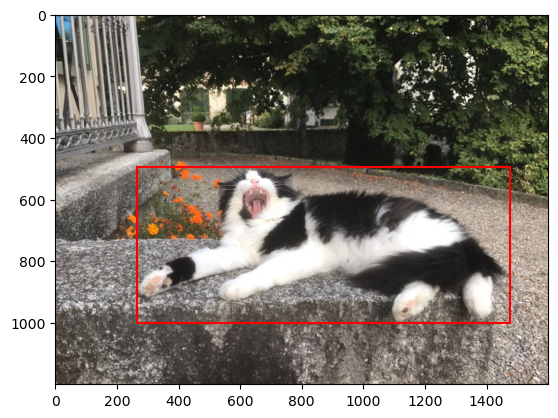

In [18]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.plot(box[:,0], box[:,1], color='red');

## Exercise



Try to run the example from this model: https://huggingface.co/mattmdjaga/segformer_b2_clothes using the picture at https://github.com/guiwitz/MLCV/raw/main/supp_data/ski.jpg

You can find infos on the training data [here](https://github.com/lemondan/HumanParsing-Dataset). With infos you can find there, plot the mask for just the pants in the image.

